In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
PARENT_PATH='./Assets/Datasets/*/'

TRAINING_PATH=PARENT_PATH + 'Train/*/*'
VALIDATION_PATH=PARENT_PATH + 'Valid/*/*'
TEST_PATH=PARENT_PATH + 'Test/*'

In [3]:
images_path_tf_data_train = tf.data.Dataset.list_files(TRAINING_PATH, shuffle=False)
images_path_tf_data_valid = tf.data.Dataset.list_files(VALIDATION_PATH, shuffle=False)
images_path_tf_data_test = tf.data.Dataset.list_files(TEST_PATH, shuffle=False)

In [4]:
classes_path=tf.data.Dataset.list_files(PARENT_PATH + 'Train/*', shuffle=False)
classes_list=[]
for class_path in classes_path:
    split_class_path = tf.strings.split(class_path, os.path.sep)
    label = split_class_path[-1].numpy().decode('UTF-8')
    classes_list.append(label)

In [5]:
import glob
# Menggunakan glob untuk mendapatkan daftar folder di PARENT_PATH + 'Train'
class_paths = glob.glob(os.path.join(PARENT_PATH, 'Train', '*'))

# Mengambil nama folder sebagai kelas
NUM_CLASSES = [os.path.basename(label) for label in class_paths]
NUM_CLASSES.sort()

print(NUM_CLASSES == classes_list)

True


In [6]:
print(f'data train: {images_path_tf_data_train}')
print(f'data valid: {images_path_tf_data_valid}')
print(f'data test: {images_path_tf_data_test}')

data train: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
data valid: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>
data test: <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>


In [7]:
print(f'number of data train: {images_path_tf_data_train.cardinality()}')
print(f'number of data valid: {images_path_tf_data_valid.cardinality()}')
print(f'number of data test: {images_path_tf_data_test.cardinality()}')

number of data train: 4589
number of data valid: 1350
number of data test: 243


In [8]:
def format_file_size(size, unit_file_size='bytes'):
    """Format file size to the specified unit."""
    units = ['bytes', 'kb', 'mb', 'gb']
    if unit_file_size.lower() not in units:
        raise ValueError(f"Invalid unit. Choose from {units}.")
    
    if unit_file_size.lower() == 'kb':
        size /= 1024
    elif unit_file_size.lower() == 'mb':
        size /= 1024 ** 2
    elif unit_file_size.lower() == 'gb':
        size /= 1024 ** 3
    
    return f'{size:.4f}' if unit_file_size.lower() != 'bytes' else size

# ==================================================== DATA TRAIN ====================================================
def show_files_path_info(files_path_data, kind_data, is_random=False, unit_file_size='bytes'):
    
    idx = np.random.randint(len(files_path_data)) if is_random else 1

    for file_path in files_path_data.skip(idx).take(1):
        print('=' * 60)
        print(' PATH INFO '.center(60, '='))
        print('=' * 60)
        print(f'File Path: {file_path}')
        print()
        
        print('=' * 60)
        print(' SPLIT FILE PATH '.center(60, '='))
        print('=' * 60)
        split_file_path = tf.strings.split(file_path, os.path.sep)
        print(f'Split File Path: {split_file_path}')
        print()
        
        print('=' * 60)
        print(' INDEXED PATH '.center(60, '='))
        print('=' * 60)
        result = {value: f'Index -> {index}' for index, value in enumerate(split_file_path.numpy())}
        for key, value in result.items():
            print(f'{value}: {key}')
        print()

        print('=' * 60)
        print(f' KIND DATA INDEX: {kind_data} '.center(60, '='))
        print('=' * 60)
        index = tf.where(tf.equal(split_file_path, kind_data))[0][0]
        print(f'Index of "{kind_data}": {index}')
        print()

        print('=' * 60)
        print(' INDEX LABEL '.center(60, '='))
        print('=' * 60)
        index_label = index + 1
        print(f'Index Label: {index_label}')
        print()

        print('=' * 60)
        print(' LABEL '.center(60, '='))
        print('=' * 60)
        print(f'Label: {split_file_path[index_label]}')
        print()

        print('=' * 60)
        print(' FILE NAME '.center(60, '='))
        print('=' * 60)
        file_name = split_file_path[-1].numpy().decode('utf-8')
        print(f'File Name: {file_name}')
        print()

        print('=' * 60)
        print(' FILE EXTENSION '.center(60, '='))
        print('=' * 60)
        file_extension = os.path.splitext(file_name)[1]
        print(f'File Extension: {file_extension}')
        print()

        print('=' * 60)
        print(' FILE SIZE '.center(60, '='))
        print('=' * 60)
        file_size = os.path.getsize(file_path.numpy().decode('utf-8'))
        file_size = format_file_size(file_size, unit_file_size=unit_file_size)
        print(f'File Size: {file_size} {unit_file_size}')
        print()

# ==================================================== DATA TEST ====================================================
def show_test_files_path_info(files_path_data, is_random=False, unit_file_size='bytes'):
    idx = np.random.randint(len(files_path_data)) if is_random else 1

    for file_path in files_path_data.skip(idx).take(1):
        print('=' * 60)
        print(' PATH INFO '.center(60, '='))
        print('=' * 60)
        print(f'File Path: {file_path}')
        print()
        
        print('=' * 60)
        print(' SPLIT FILE PATH '.center(60, '='))
        print('=' * 60)
        split_file_path = tf.strings.split(file_path, os.path.sep)
        print(f'Split File Path: {split_file_path}')
        print()
        
        print('=' * 60)
        print(' INDEXED PATH '.center(60, '='))
        print('=' * 60)
        result = {value: f'Index -> {index}' for index, value in enumerate(split_file_path.numpy())}
        for key, value in result.items():
            print(f'{value}: {key}')
        print()

        print('=' * 60)
        print(' FILE NAME '.center(60, '='))
        print('=' * 60)
        file_name = split_file_path[-1].numpy().decode('utf-8')
        print(f'File Name: {file_name}')
        print()

        print('=' * 60)
        print(' FILE EXTENSION '.center(60, '='))
        print('=' * 60)
        file_extension = os.path.splitext(file_name)[1]
        print(f'File Extension: {file_extension}')
        print()

        print('=' * 60)
        print(' FILE SIZE '.center(60, '='))
        print('=' * 60)
        file_size = os.path.getsize(file_path.numpy().decode('utf-8'))
        file_size = format_file_size(file_size, unit_file_size=unit_file_size)
        print(f'File Size: {file_size} {unit_file_size}')
        print()

In [9]:
show_files_path_info(images_path_tf_data_train, kind_data='Train', is_random=True, unit_file_size='KB')

======================== PATH INFO =========================
File Path: b'.\\Assets\\Datasets\\SIBI dataset\\Train\\Y\\image_X_(1685170908.7685463).jpg'

===================== SPLIT FILE PATH ======================
Split File Path: [b'.' b'Assets' b'Datasets' b'SIBI dataset' b'Train' b'Y'
 b'image_X_(1685170908.7685463).jpg']

======================= INDEXED PATH =======================
Index -> 0: b'.'
Index -> 1: b'Assets'
Index -> 2: b'Datasets'
Index -> 3: b'SIBI dataset'
Index -> 4: b'Train'
Index -> 5: b'Y'
Index -> 6: b'image_X_(1685170908.7685463).jpg'

================== KIND DATA INDEX: Train ==================
Index of "Train": 4

======================= INDEX LABEL ========================
Index Label: 5

========================== LABEL ===========================
Label: b'Y'

======================== FILE NAME =========================
File Name: image_X_(1685170908.7685463).jpg

====================== FILE EXTENSION ======================
File Extension: .jpg

==========

In [10]:
show_files_path_info(images_path_tf_data_valid, kind_data='Valid', is_random=True, unit_file_size='KB')

======================== PATH INFO =========================
File Path: b'.\\Assets\\Datasets\\SIBI dataset\\Valid\\X\\image_X_(1685775210.5254586).jpg'

===================== SPLIT FILE PATH ======================
Split File Path: [b'.' b'Assets' b'Datasets' b'SIBI dataset' b'Valid' b'X'
 b'image_X_(1685775210.5254586).jpg']

======================= INDEXED PATH =======================
Index -> 0: b'.'
Index -> 1: b'Assets'
Index -> 2: b'Datasets'
Index -> 3: b'SIBI dataset'
Index -> 4: b'Valid'
Index -> 5: b'X'
Index -> 6: b'image_X_(1685775210.5254586).jpg'

================== KIND DATA INDEX: Valid ==================
Index of "Valid": 4

======================= INDEX LABEL ========================
Index Label: 5

========================== LABEL ===========================
Label: b'X'

======================== FILE NAME =========================
File Name: image_X_(1685775210.5254586).jpg

====================== FILE EXTENSION ======================
File Extension: .jpg

==========

In [11]:
show_test_files_path_info(images_path_tf_data_test, is_random=True, unit_file_size='KB')

======================== PATH INFO =========================
File Path: b'.\\Assets\\Datasets\\SIBI dataset\\Test\\image_D_(1685775492.3925877).jpg'

===================== SPLIT FILE PATH ======================
Split File Path: [b'.' b'Assets' b'Datasets' b'SIBI dataset' b'Test'
 b'image_D_(1685775492.3925877).jpg']

======================= INDEXED PATH =======================
Index -> 0: b'.'
Index -> 1: b'Assets'
Index -> 2: b'Datasets'
Index -> 3: b'SIBI dataset'
Index -> 4: b'Test'
Index -> 5: b'image_D_(1685775492.3925877).jpg'

======================== FILE NAME =========================
File Name: image_D_(1685775492.3925877).jpg

====================== FILE EXTENSION ======================
File Extension: .jpg

======================== FILE SIZE =========================
File Size: 13.6123 KB



In [12]:
def convert_path_to_img_tf_data_train(image_path, label_idx_from_path, target_size, is_gray=True):
    split_img_path = tf.strings.split(image_path, os.path.sep)
    label = split_img_path[label_idx_from_path]

    channels = 1 if is_gray else 3 
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=channels) 
    image.set_shape([None, None, channels])
    image = tf.image.resize(image, size=(target_size[0], target_size[1]))
    image = image / 255.0

    return image, label

In [13]:
new_height=224
new_width=224
label_idx_from_path=5

images_tf_data_train = images_path_tf_data_train.map(
    map_func=lambda image_path: 
        convert_path_to_img_tf_data_train(
            image_path=image_path, 
            label_idx_from_path=label_idx_from_path, 
            target_size=(new_height, new_width),
            is_gray=False,
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

images_tf_data_valid = images_path_tf_data_train.map(
    map_func=lambda image_path: 
        convert_path_to_img_tf_data_train(
            image_path=image_path, 
            label_idx_from_path=label_idx_from_path, 
            target_size=(new_height, new_width),
            is_gray=False,
        ),
    num_parallel_calls=tf.data.AUTOTUNE
)

images_tf_data = images_tf_data_train.concatenate(images_tf_data_valid)
images_tf_data_cached = images_tf_data.cache()

In [14]:
print(f'info train data: {images_tf_data_cached}')
print(f'number of train data: {len(images_tf_data_cached)}')

info train data: <CacheDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>
number of train data: 9178


=======================Check Train Data======================
    shape-image: (224, 224, 3)
    dtype-image: <dtype: 'float32'>
    max-intensity: 1.0
    min-intensity: 0.0

    label: b'A'
    label-shape: ()
    image-type: <dtype: 'string'>


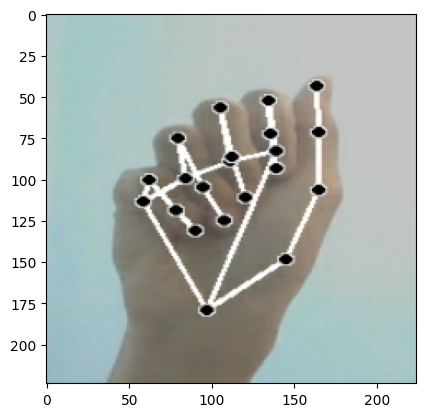

In [16]:
for image, label in images_tf_data_cached.skip(3).take(1):
    print(f"{'Check Train Data'.center(61, '=')}")
    print(f'''    shape-image: {image.shape}
    dtype-image: {image.dtype}
    max-intensity: {tf.reduce_max(image)}
    min-intensity: {tf.reduce_min(image)}

    label: {label}
    label-shape: {label.shape}
    image-type: {label.dtype}'''
    )

    plt.imshow(image, cmap='gray')
plt.show()

In [17]:
def one_hot_encode(image, label, num_classes):
    label = tf.argmax(tf.equal(label, num_classes))
    label = tf.one_hot(label, depth=len(num_classes), dtype=tf.float32)
    return image, label

dataset = images_tf_data_cached.map(lambda image, label: one_hot_encode(image, label, NUM_CLASSES))

=======================Check Train Data======================
    shape-image: (224, 224, 3)
    dtype-image: <dtype: 'float32'>
    max-intensity: 1.0
    min-intensity: 0.0

    one-hot-label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
    label-shape: (27,)
    image-type: <dtype: 'float32'>


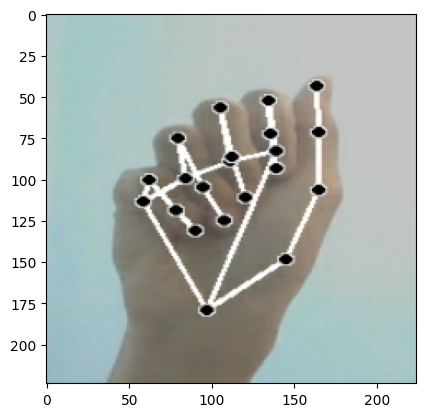

In [18]:
# Menampilkan contoh data yang telah diubah
for image, label in dataset.skip(3).take(1):
    print(f"{'Check Train Data'.center(61, '=')}")
    print(f'''    shape-image: {image.shape}
    dtype-image: {image.dtype}
    max-intensity: {tf.reduce_max(image)}
    min-intensity: {tf.reduce_min(image)}

    one-hot-label: {label.numpy()}
    label-shape: {label.shape}
    image-type: {label.dtype}'''
    )

    plt.imshow(image, cmap='gray')
plt.show()